
<i><b>CS484 - CS555 Introduction to Computer Vision

>Dr. Sedat OZER 

>Submission Deadline:</b>  23:55, May 09, 2021  - After  that  time, late submissions will receieve 25% penalty per additional day!

><b>TA e-mail:</b> 
>> Akif: akif.ozkanoglu@bilkent.edu.tr


><b>Submission link:</b> (Submit your HW through this link:) https://forms.gle/vjBGhAixqrdSyVFE6 <i/>


# Running your code on Google Colab

(This part is a repetation from the first HW)

*  It is strongly advised that you first go through the links below and familiarize yourself with the Colab environment. 

* You should first load this HW file (HW3.ipynb) on Google Colab ( https://colab.research.google.com ) and run it on Google Colab which acts as a remote server since we will also test your code on Colab. Then go through the links below to get a better understanding of Colab environment.
* Note that you can run this file on your local jupyter notebook as well, however, we will test your submissions on Google Colab and your code and submitted notebook is expected to run on Google Colab. It is student's responsibility to make sure that his/her submitted file will run on Colab without any error.

Useful links (You should go through the links below to get introductory material for Colab and image processing with Python, if you had not done so already!):

* https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/colab.html

* https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

* https://colab.research.google.com/drive/1b8pVMMoR37a3b9ICo8TMqMLVD-WvbzTk

* There are many Colab tutorials available on Youtube. Here is a short video: https://www.youtube.com/watch?v=inN8seMm7UI and another video: https://www.youtube.com/watch?v=i-HnvsehuSw



#### __Instructions and Notes on Answering Your Homework__

* Save a copy of your own HW3.ipynb file locally and save that file in the following format: ***FullName_StudentID_HW3.ipynb***, where FullName is your name and surname respectively, and StudentID is your student ID number. Then you can upload that file on Colab.
* Use the submission link (see above for the link) to submit your solutions.
Email your questions to the TA ( akif.ozkanoglu@bilkent.edu.tr ).
* You will be graded for your <b>implementation</b>, <b>results</b> and also for a <b>brief explanation</b> of your answer, if asked.
* An implementation that is not generating the correct result, may not receive any credit. To get full credit for a question, you need to follow all the instructions given for that question and provide all the required discussions and results correctly.
* We will run your code on Colab. Make sure that your code runs without any  error on Colab (codes giving error, may not receive any credit).
* All submissions must have your own code/implementation. To get ideas, you can discuss with your friends. But, your submission must be your own work.
* Cheating will be punished as described on the course website.
* AGAIN: SUBMIT  YOUR SOLUTIONS (your new .ipynb file) as a zip file (as described above) at: https://forms.gle/vjBGhAixqrdSyVFE6 
*  Late submissions will receive %25 per day passing the submission deadline. If  you submit your solutions in any other format than .zip format, you will also receive 10 points penalty.








#### __Loading data from your Google Drive__

For loading a file on Colab - you can check the following two sites to get ideas:
* https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab
*  https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4

You will load image files in this HW and all of those files are saved in .png format. Loading those files from your Google Drive uses the same logic as you used in your first and second HWs to load images.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Important!!!
You should change root directory w.r.t. your Google drive. All image path will be defined like 

```
image_path = root_dir + 'hough2.png' 
```
This step is very important for grading


In [3]:
# Defıne your root directory that includes given images in zip file
root_dir="/content/drive/MyDrive/CS484-CS555/Hw3/"
# sample image to load in the above-given string format
image_hough2 = root_dir + 'edge1.png' 

import os
print(f"{root_dir} is succesfully located") if os.path.exists(image_hough2)  else print(f"{root_dir} is not located")

/content/drive/MyDrive/CS484-CS555/Hw3/ is succesfully located


# Part 1



In this question, we will study multiple spatial filtering operations.
In this part of the assignment, you will perform edge detection on the provided three images: `edge1.png`, `edge2.png`, `edge3.png`. You will use different edge detection methods including Sobel, Prewitt and Canny edge detector. You will use gray-scale, single channel version of the provided images.


## 1.1 Edge detection with Sobel and Prewitt operators

On each of the given three images, you will detect edges by using Sobel and Prewitt operators separately.


*   3x3 Sobel Operators: For each given image above, detect horizontal and vertical edges by using Sobel operators and plot them. Include the results in your report. You will perform both horizontal and vertical edge detection on each image separately by using the corresponding 3x3 Sobel operator.
*   3x3 Prewitt Operators: For each given image above, detect horizontal and vertical edges by using Prewitt operators and plot them. Include the results in your report. You will perform both horizontal and vertical edge detection on each image separately by using the corresponding 3x3 Prewitt operator
* Comment on your results: Show your results and comment on them: are all the edges successfully detected? Are there any difference between using Sobel and Prewitt filters? If so, report in designated text cell which one yielded better result.


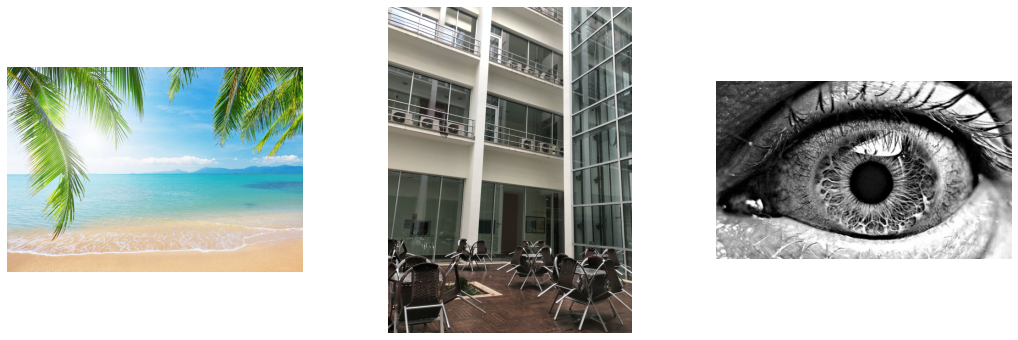

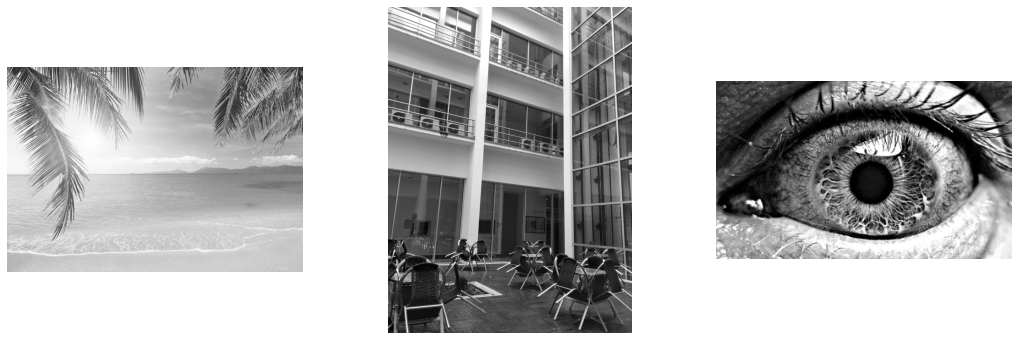

In [4]:
import numpy as np, matplotlib.pyplot as plt


# Let's see the images and their shapes
fig, axes = plt.subplots(1,3,figsize = (18,6))
img_paths = ['edge1.png','edge2.png','edge3.png']

for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  axs.imshow(img)
  axs.axis('off')

rgb2gray = lambda image : image[...,:3] @ [0.299, 0.587, 0.114]


fig, axes = plt.subplots(1,3,figsize = (18,6))
for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  img = rgb2gray(img)
  axs.imshow(img, cmap=plt.cm.gray)
  axs.axis('off')


In [7]:
# Sobel and Prewitt Operators
# implement your code here...


def plotFilter2D(kernel:np.ndarray,
                 title:str = " ",
                 cmap:str='coolwarm',
                 figsize:tuple = (10,10),
                 kwargs:dict = None) -> None:

    """
        Given the kernel, plot the kernel in 2-D surface.

            Arguments:
                - kernel (np.ndarray) : Kernel to be plotted
                - title  (str)        : Title of the figure
                - cmap   (str)        : Texture of the figure
                - figsize (tuple)     : Figure size
                - kwargs (dict)       : Additional arguments to plot if exists

            Returns:
                - None

    """

    plt.figure(figsize = figsize)

    if kwargs is not None:
        plt.imshow(kernel,cmap=cmap,**kwargs)
    else:
        plt.imshow(kernel,cmap=cmap)       
    
    plt.title(title)
    plt.colorbar()
    plt.show()



def plotFilter3D(kernel:np.ndarray,
                 title:str = " ",
                 kernel_name:str = " ", 
                 cmap:str='coolwarm',
                 figsize:tuple = (10,10),
                 kwargs:dict = None) -> None:

    """
        Given the kernel, plot the kernel in 2-D surface.

            Arguments:
                - kernel (np.ndarray) : Kernel to be plotted
                - title  (str)        : Title of the figure
                - kernel_name (str)   : The name of the filter/kernel
                - cmap   (str)        : Texture of the figure
                - figsize (tuple)     : Figure size
                - kwargs (dict)       : Additional orguments to plot if exists

            Returns:
                - None

    """

    fig_3D = plt.figure(figsize = (10,10))
    size = kernel.shape[0] // 2
    ax_3D = plt.axes(projection='3d')

    x,y = np.mgrid[-size: size + 1, -size: size + 1]
    
    """
    np.meshgrid(
        np.arange( - int(size / 2), 1 + int(size / 2)),
        np.arange( - int(size / 2), 1 + int(size / 2))
                )
    """
    if kwargs is not None:
        ax_3D.plot_surface(x, y, kernel, cmap = cmap, **kwargs)
    else:
        ax_3D.plot_surface(x, y,kernel, cmap = cmap)   
    
    ax_3D.set_xlabel('x')
    ax_3D.set_ylabel('y')
    ax_3D.set_zlabel(f'{kernel_name}(x, y)')
    plt.title(title)
    plt.show()



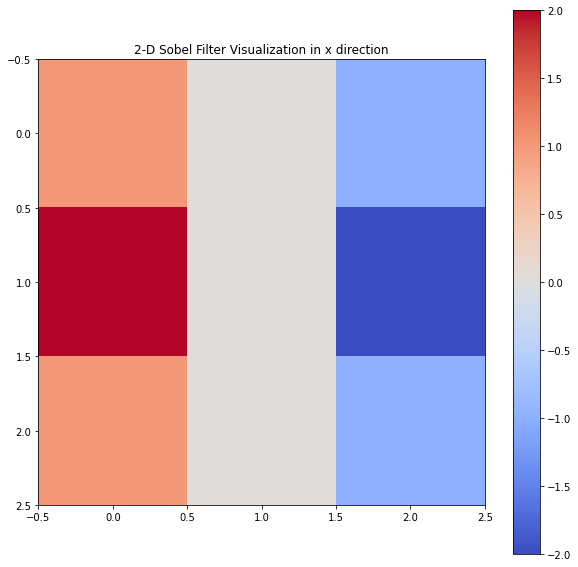

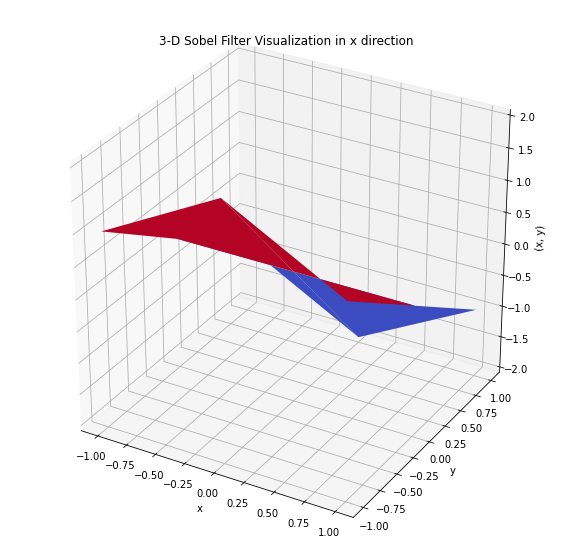

In [8]:
sobel_x = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]],
                   dtype = np.float32)


plotFilter2D(sobel_x, title = '2-D Sobel Filter Visualization in x direction')
plotFilter3D(sobel_x, title = '3-D Sobel Filter Visualization in x direction')


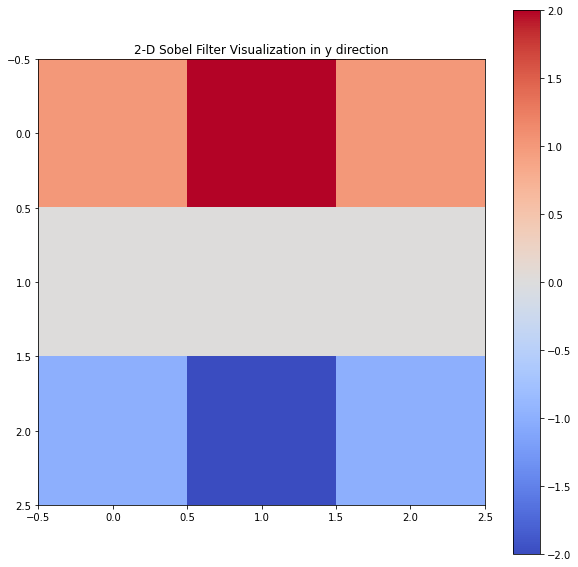

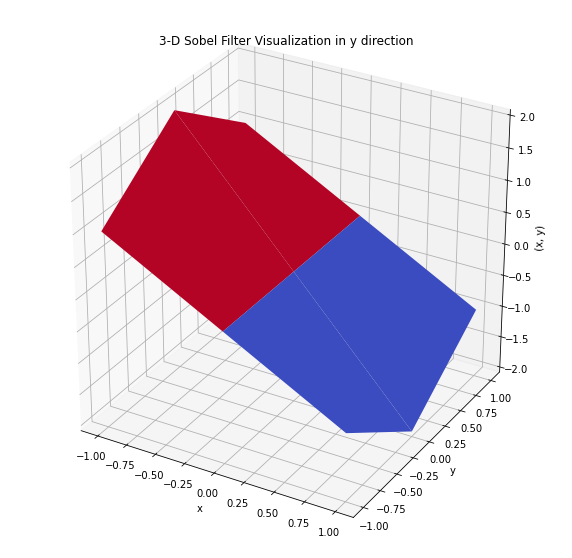

In [9]:
sobel_y = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]],
                    dtype = np.float32)


plotFilter2D(sobel_y, title = '2-D Sobel Filter Visualization in y direction')
plotFilter3D(sobel_y, title = '3-D Sobel Filter Visualization in y direction')


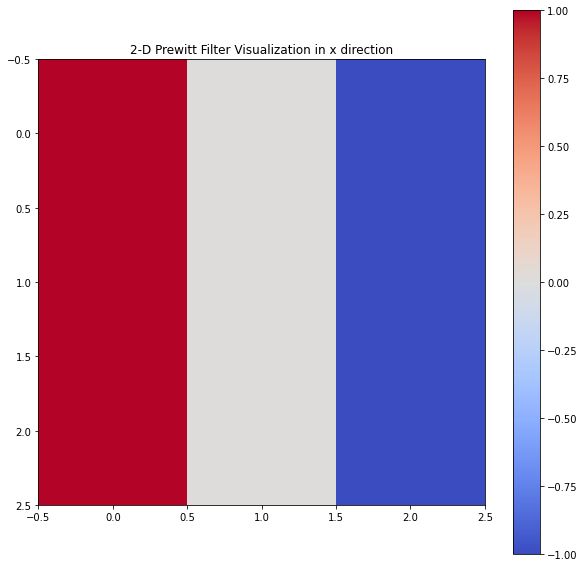

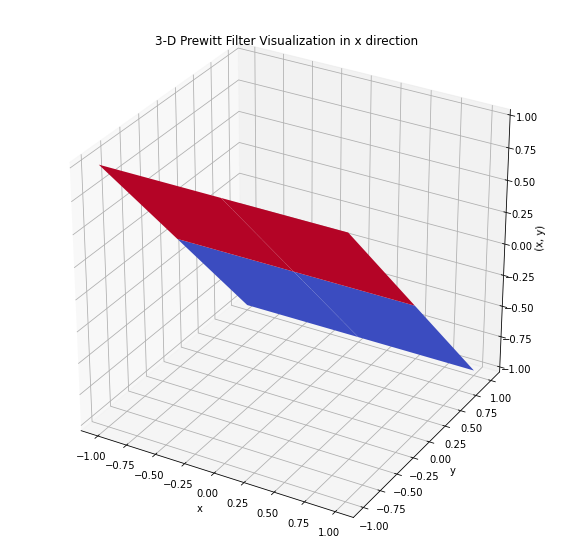

In [10]:
prewitt_x = np.array([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]])


plotFilter2D(prewitt_x, title = '2-D Prewitt Filter Visualization in x direction')
plotFilter3D(prewitt_x, title = '3-D Prewitt Filter Visualization in x direction')  

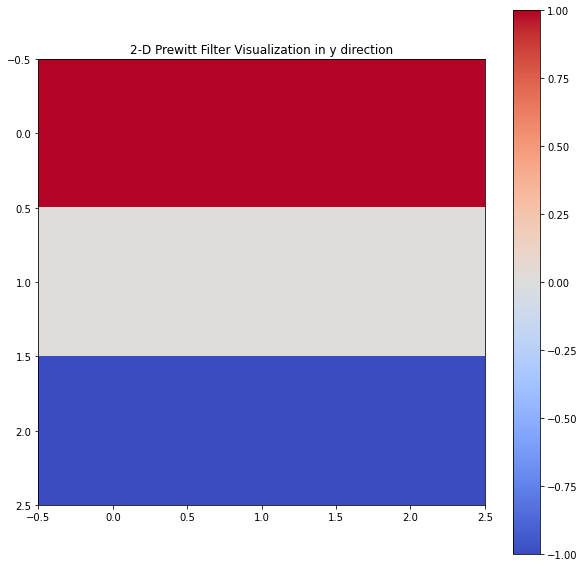

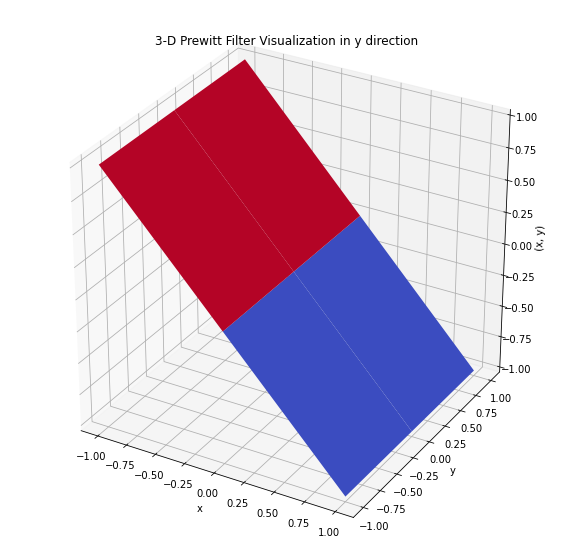

In [11]:
prewitt_y = np.array([[1,1,1],
                      [0,0,0],
                      [-1,-1,-1]])

plotFilter2D(prewitt_y, title = '2-D Prewitt Filter Visualization in y direction')
plotFilter3D(prewitt_y, title = '3-D Prewitt Filter Visualization in y direction')  

In [25]:
class _Window(object):
  """
    This class creates a generator that slide over the given image with
    predefined step and window size.

      Attributes:
        - image      : input image to be sliding
        - step_size  : it determines how much slice the generator extract
        - dims       : resulting image's dimensions

      Methods:
        - __iter__   : creates a generator over the image with given patch dimensions

  """
  def __init__(self,image :np.ndarray, step_size:tuple, dims: tuple):
    """ 
      Creates an constructor for _Window class, this method encapsulates
      all necessary data to generate windows over image.  

    """
    self.image = image 
    self.dims = dims 
    self.step_size = step_size

  def __iter__(self):
    """ Generator function to window over image. """
    for x in range(self.dims[0]):
      for y in range(self.dims[1]):
        yield self.image[x:x + self.step_size[0], y:y + self.step_size[1]]


def Conv2D(source_image : np.ndarray, kernel: np.ndarray) -> np.ndarray:
  """
   Convolution is the process of adding each element of the image to its local neighbors,weighted by the kernel. This is related to a form of mathematical convolution.
   
      Arguments:
        - source_image   (np.ndarray) : Gray scale image to be convolved
        - kernel         (np.ndarray) : Kernel to be sliding over the image

      Returns:
        - conv_image     (np.ndarray) : Resulting convolved image
  """

  assert (len(source_image.shape)   == 2), "Image is not gray scale" 
  assert (len(kernel.shape) == 2), "Kernel is not in required size, should be 2 dimensional"      
  
  source_image =  np.asarray(source_image).copy()
  H,W = source_image.shape
  k_h,k_w = kernel.shape
  padded_image = np.pad(array = source_image, pad_width = max(k_w,k_w) // 2 + 1, mode = 'constant')

  new_H,new_W = padded_image.shape
  h_pad , w_pad  =  (new_H - H) , (new_W - W)

  # Creating sliding window:
  image_window = _Window(padded_image,(k_h,k_w),(new_H - h_pad, new_W - w_pad))

  #kernel = np.flipud(np.fliplr(kernel))
  # Main operation:
  conv_image = [(patch * kernel).sum() for patch in image_window]
  
  return np.array(conv_image).reshape(H,W)

def min_max_scaler(matrix : np.ndarray)-> np.ndarray :
  """
    Given the matrix, apply normalization as follow:

        norm_matrix = (matrix - min_val) / (max_val - min_val)

    Arguments:
      -  matrix     (np.ndarray) : Input Matrix

    Returns:
      - norm_matrix (np.ndarray) : Normalized version of matr

  """
  matrix = np.asarray(matrix).copy()
  max_val = matrix.max()
  min_val = matrix.min()

  return (matrix - min_val) / (max_val - min_val)

def sobel_filter(source_image : np.ndarray) -> np.ndarray:
    """

      Given the source image, implements sobel filter as two directional filtering.

      The kernels Gx and Gy can be thought of as a differential operation in the "source_image" array in the directions x and y 
      respectively. These kernels are represented by the following matrices:

         _              _                    _                _
        |                 |                 |                  |
        | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
    Gx =| 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
        | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
        |_               _|                 |_                _|

    """

    assert (len(source_image.shape)   == 2), "Image is not gray scale" 
     
    #Define operators for vertical and horizontal edge detection
    sobel_x = np.array([[1,0,-1],
                       [2,0,-2],
                       [1,0,-1]])
    
    sobel_y = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])
    
    g_x = Conv2D(source_image, sobel_x)
    g_y = Conv2D(source_image, sobel_y)

    return np.hypot(g_x, g_y)

def prewitt_filter(source_image : np.ndarray) -> np.ndarray:
    """

      Given the source image, implements prewitt filter as two directional filtering.

      The kernels Gx and Gy can be thought of as a differential operation in the "source_image" array in the directions x and y 
      respectively. These kernels are represented by the following matrices:

         _              _                    _                _
        |                 |                 |                  |
        | 1.0   0.0  -1.0 |                 |  1.0   1.0   1.0 |
    Gx =| 1.0   0.0  -1.0 |    and     Gy = |  0.0   0.0   0.0 |
        | 1.0   0.0  -1.0 |                 | -1.0  -1.0  -1.0 |
        |_               _|                 |_                _|

    """
    assert (len(source_image.shape)   == 2), "Image is not gray scale" 
     
    
    prewitt_x = np.array([[1,0,-1],
                         [1,0,-1],
                         [1,0,-1]])
    
    prewitt_y = np.array([[1,1,1],
                         [0,0,0],
                         [-1,-1,-1]])

    g_x = Conv2D(source_image,prewitt_x)
    g_y = Conv2D(source_image,prewitt_y)

    return np.hypot(g_x, g_y)

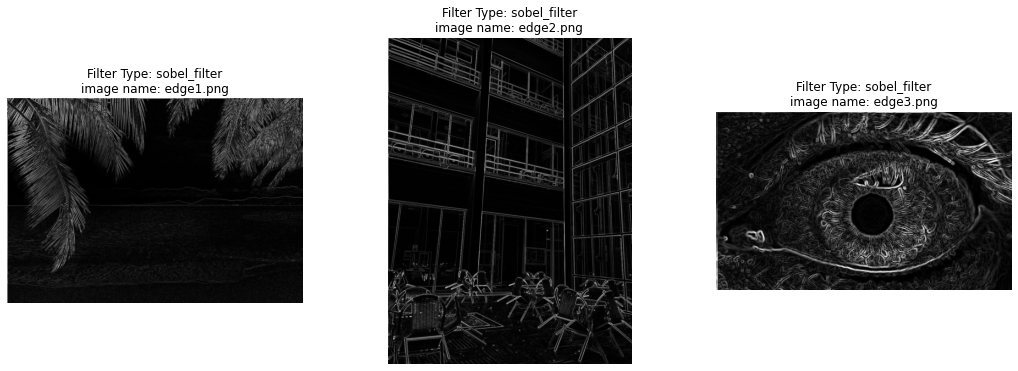

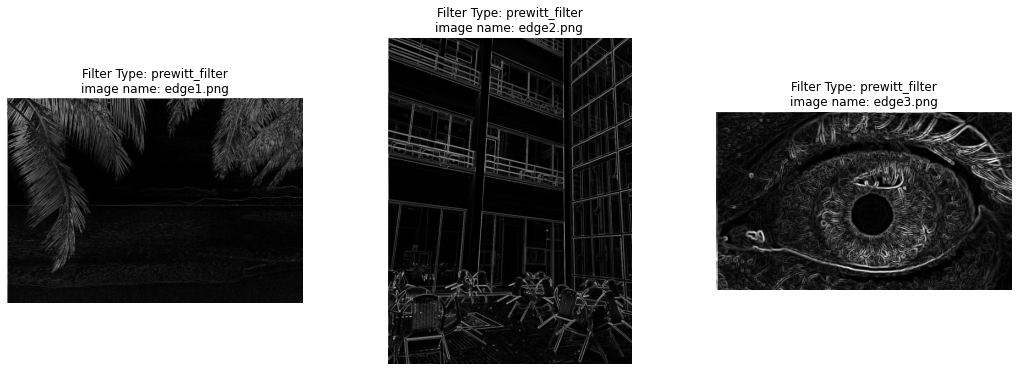

In [27]:
img_paths = ['edge1.png','edge2.png','edge3.png']
fig, axes = plt.subplots(1,3,figsize = (18,6))
for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  img = rgb2gray(img)
  img = sobel_filter(img)
  axs.imshow(img, cmap=plt.cm.gray)
  axs.axis('off')
  axs.set_title( 'Filter Type: ' + sobel_filter.__name__ +  '\n' + 'image name: ' + img_path)

fig, axes = plt.subplots(1,3,figsize = (18,6))
for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  img = rgb2gray(img)
  img = prewitt_filter(img)
  axs.imshow(img, cmap=plt.cm.gray)
  axs.axis('off')
  axs.set_title( 'Filter Type: ' + prewitt_filter.__name__ +  '\n' + 'image name: ' + img_path)

---ENTER your comments here!! ---

--- 

#Answer
As we can see from the above visualizations of detected egde components, sobel and prewitt performs reasonable. The results shows that Sobel edge detection technique is similar to the Prewitt edge detection technique. Though Prewitt technique is similar to Sobel but there is difference of spectral response. Sobel have slightly superior noise-suppression characteristics, an important issue when dealing with derivatives. Even it may not be generalizable, this is the case in our edge detection situation. 

## 1.2 Edge detection with Canny edge detector

Another method that you will use for edge detection is Canny edge detector.
For this part, you have to find optimal parameters of Canny edge detector including the Gaussian smoothing parameter σ and the hysteresis thresholding parameters: T_low and T_high (in total three parameters) for each image.

* Report the best values for each of those three parameters that worked best for you on each image. Comment on why you think that those parameters are the best parameters.
* In your results, for comparison, include at least four different sets of parameters (i.e., you need to show different σ, T_low and T_high values and their corresponding result for four times).
* How do your results compare to the results obtained from Sobel and Prewitt operators? If you see an improvement, comment on the potential reasons for that.

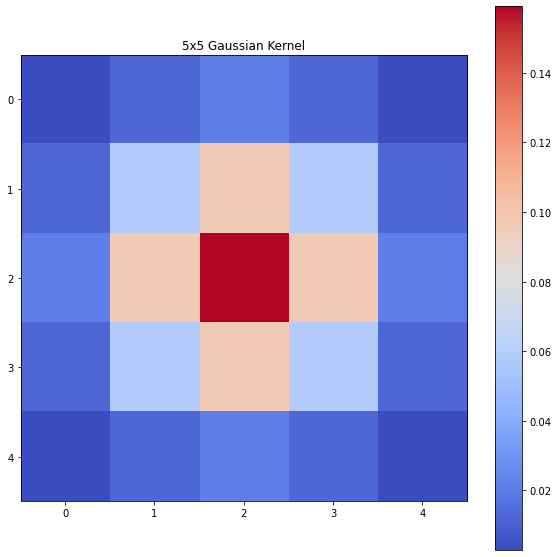

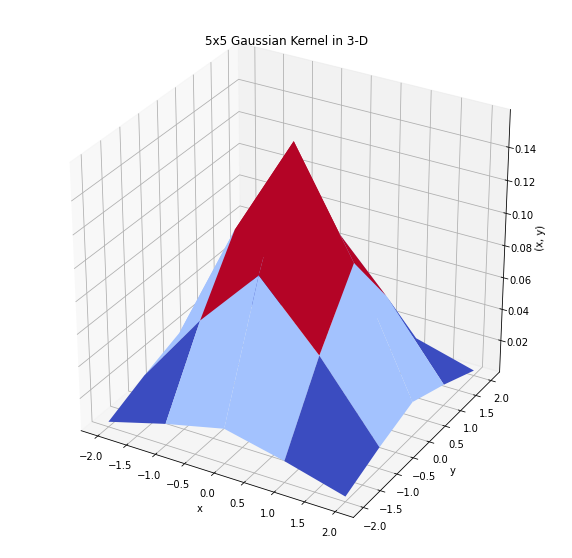

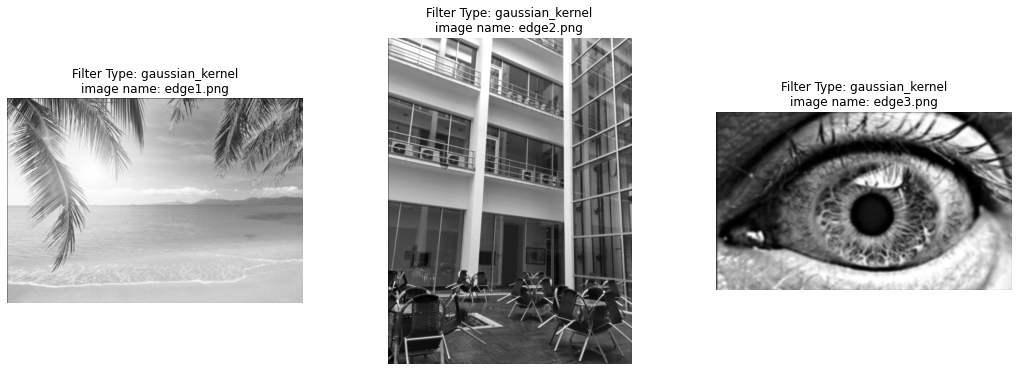

In [14]:
# Canny Edge Detector
# implement your code here...


class CannyEdgeDetector(object):

  """
    Canny Edge Detector Steps:
    1) Smooth image with Gaussian Noise.
    2) Find magnitude and orientation of gradient.
    3) Apply Non-max suppression.
    4) Apply double threshold
    4) Apply Hysteresis threshold.

  """

  def __init__(self,
               sigma:float = 1,
               thres_low:int = None,
               thres_high:int = None,
               gauss_kernel_size:int = 5):
    
    self.sigma = sigma
    self.thres_low = thres_low
    self.thres_high = thres_high
    self.gauss_kernel_size =  gauss_kernel_size

  def gaussian_kernel(self) -> np.ndarray:
      """ Given the kernel size k and sigma, this function creates a k x k guassian kernel with variability captured by sigma.  """
  

      size = int(self.gauss_kernel_size) // 2
      x, y = np.mgrid[-size:size+1, -size:size+1]
      normalize = 1 / (2.0 * np.pi * self.sigma**2)
      g =  np.exp(-((x**2 + y**2) / (2.0*self.sigma**2)))
      g *= normalize
      return g

  def gaussian_blur(self, image:np.ndarray) -> np.ndarray:
    return Conv2D(image, self.gaussian_kernel())



detector = CannyEdgeDetector(gauss_kernel_size = 5)
plotFilter2D(detector.gaussian_kernel(),title = '5x5 Gaussian Kernel')
plotFilter3D(detector.gaussian_kernel(),title = '5x5 Gaussian Kernel in 3-D')

fig, axes = plt.subplots(1,3,figsize = (18,6))
for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  img = rgb2gray(img)
  img = detector.gaussian_blur(img)
  axs.imshow(img, cmap=plt.cm.gray)
  axs.axis('off')
  axs.set_title( 'Filter Type: ' + detector.gaussian_kernel.__name__ +  '\n' + 'image name: ' + img_path)


In [15]:
class CannyEdgeDetector(CannyEdgeDetector):

  @staticmethod
  def sobel_filter(source_image : np.ndarray) -> np.ndarray:
    """

      Given the source image, implements sobel filter as two directional filtering.

      The kernels Gx and Gy can be thought of as a differential operation in the "source_image" array in the directions x and y 
      respectively. These kernels are represented by the following matrices:

         _              _                    _                _
        |                 |                 |                  |
        | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
    Gx =| 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
        | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
        |_               _|                 |_                _|

    """

    assert (len(source_image.shape)   == 2), "Image is not gray scale" 
     
    #Define operators for vertical and horizontal edge detection
    sobel_x = np.array([[1,0,-1],
                       [2,0,-2],
                       [1,0,-1]])
    
    sobel_y = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]])
    
    g_x = Conv2D(source_image, sobel_x)
    g_y = Conv2D(source_image, sobel_y)

    g = np.hypot(g_x, g_y)

    g = min_max_scaler(g) * 255
    theta = np.arctan2(g_x, g_y)
    
    return (g, theta)


In [16]:
class CannyEdgeDetector(CannyEdgeDetector):

  def _non_maximum_suppression(self,
                               grad_intensity_mat  : np.ndarray,
                               gradient_directions : np.ndarray ) -> np.ndarray:


    """

      Given the gradient intensity matrix, applies non-maximum suppression algorithm as follows:

      1) Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
      2) Identify the edge direction based on the angle value from the angle matrix;
      3) Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
      4) Return the image processed with the non-max suppression algorithm


      Arguments:
        - grad_intensity_mat  (np.ndarray) : Gradient Intensity Matrix
        - gradient_directions (np.ndarray) : Gradient Direction

      Returns:
        - res (np.ndarray) : image processed with the non-max suppression algorithm

    """

    assert (len(grad_intensity_mat.shape)  == 2), "Gradient Intensity Matrix is not 2-D" 
    assert (isinstance(gradient_directions, np.ndarray)), "Gradient Direction is not NumPy Array"  


    H_grad, W_grad = grad_intensity_mat.shape[:2]
    res = np.zeros_like(grad_intensity_mat, dtype=np.int32)
    angle = gradient_directions * 180 / np.pi

    angle[angle < 0] += 180

    for i in range(1, H_grad - 1):
      for j in range(1, W_grad - 1):

            # center's intensity:
            grad_intensity = grad_intensity_mat[i, j] 

            # Angle of corresponding edge:
            grad_angle = angle[i, j] 

            r = 255
            q = 255

            # angle 0 -> vertical line
            if 0 <= grad_angle < 22.5 or 157.5 <= grad_angle <= 180:
                q = grad_intensity_mat[i, j + 1]
                r = grad_intensity_mat[i, j - 1]
            
            # angle 45 -> diagonal line with positive slope
            elif 22.5 <= grad_angle < 67.5:
                q = grad_intensity_mat[i + 1, j - 1]
                r = grad_intensity_mat[i - 1, j + 1]
            
            # angle 90 -> horizontal line
            elif 67.5 <= grad_angle < 112.5:
                q = grad_intensity_mat[i + 1, j]
                r = grad_intensity_mat[i - 1, j]
            
            # angle 135 -> diagonal line with negative slope
            elif 112.5 <= grad_angle < 157.5:
                q = grad_intensity_mat[i - 1, j - 1]
                r = grad_intensity_mat[i + 1, j + 1]

            if grad_intensity >= q and grad_intensity >= r:
                res[i, j] = grad_intensity
            else:
                res[i, j] = 0
    
    return res

In [17]:
class CannyEdgeDetector(CannyEdgeDetector):
  def _multi_threshold(self,
                      image:np.ndarray,
                      weak:int = 35,
                      strong:int = 255) -> np.ndarray:

    """ 
    
    Given the image, weak and strong pixel intensity, and lower and higher threshold values, applies double thresholding.

      Arguments:
        - image   (np.ndarray) : Source image to be thresholded
        - weak    (int)        : Weak point 
        - strong  (int)        : 
      
      
      
    """

    assert (len(image.shape)  == 2), "Image Matrix is not 2-D" 

    high_threshold = image.max() * self.thres_high 
    low_threshold = image.max() * self.thres_low

    res = np.zeros_like(image)

    res[np.where(image >= high_threshold)] = strong
    res[np.where((image >= low_threshold) & (image < high_threshold))] = weak

    return res

In [18]:
class CannyEdgeDetector(CannyEdgeDetector):

  def _hysteresis(self,
                 image:np.ndarray,
                 weak:int = 15,
                 strong:int = 255) -> np.ndarray:

      H,W = image.shape
      weak_i, weak_j = np.where(img == weak)
      res = image.copy()

      for i, j in zip(weak_i, weak_j):
          if np.any(res[i - 1: i + 2, j - 1: j + 2] == strong):
              res[i, j] = strong

          else:
              res[i, j] = 0

      return res


  def __call__(self, image:np.ndarray) -> np.ndarray:
   
    """
      Applies sequentially to given image:

        1) Smooth image with Gaussian Noise.
        2) Find magnitude and orientation of gradient.
        3) Apply Non-max suppression.
        4) Apply double threshold
        5) Apply Hysteresis threshold.

    """

    
    blurred_image = self.gaussian_blur(image)
    g, theta = self.sobel_filter(blurred_image)
    supressed_image = self._non_maximum_suppression(g, theta)
    thres_image = self._multi_threshold(supressed_image)
    final_image = self._hysteresis(thres_image)

    return final_image

Takes a little bit of time...
CPU times: user 7min 5s, sys: 1.44 s, total: 7min 7s
Wall time: 7min 8s


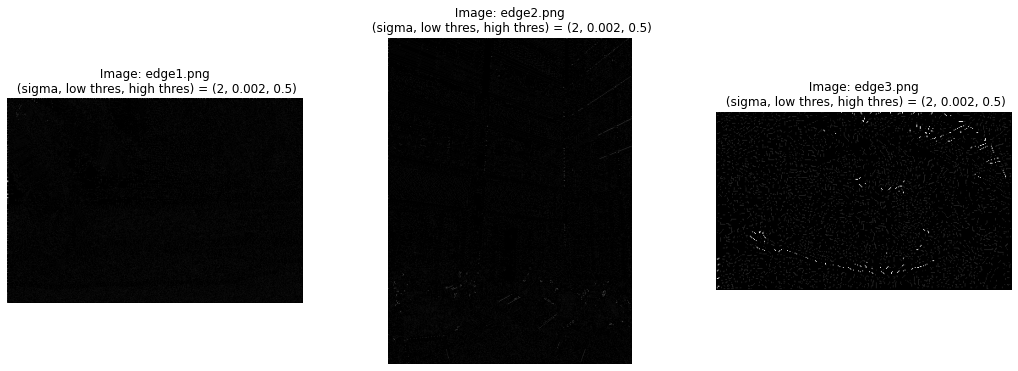

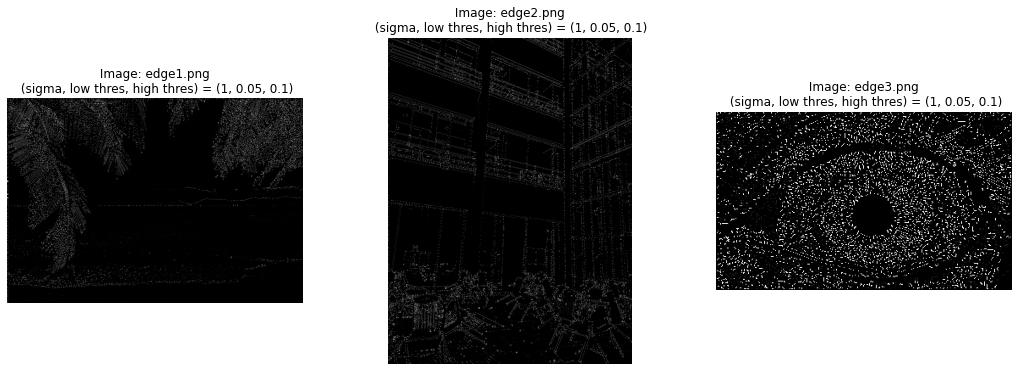

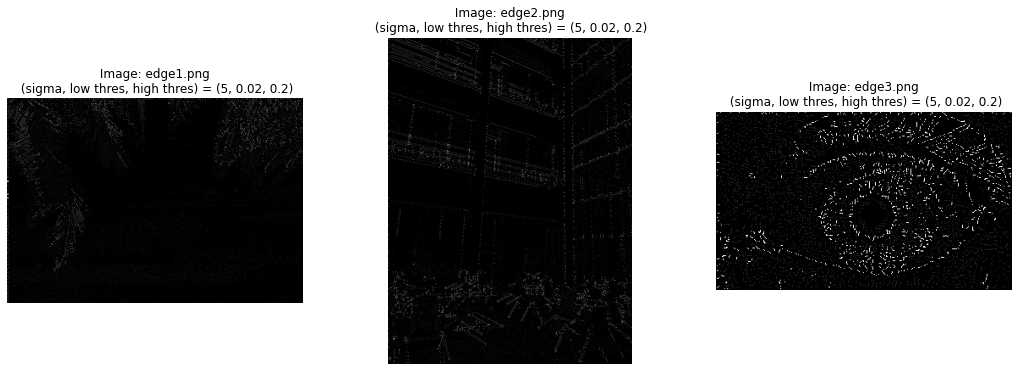

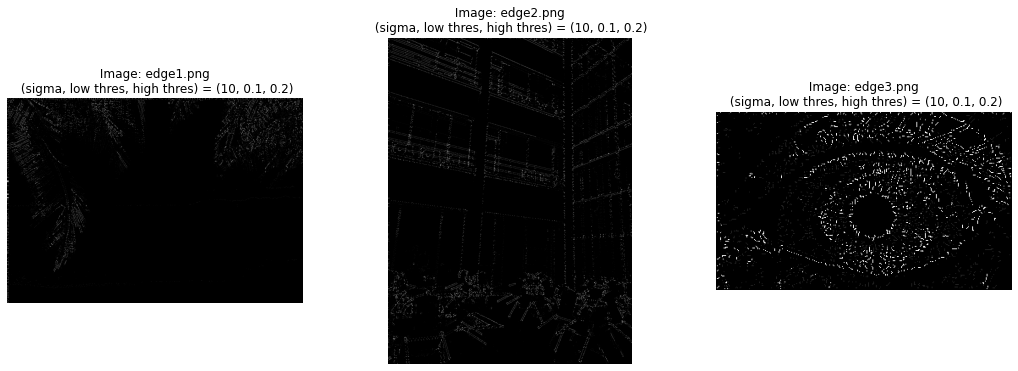

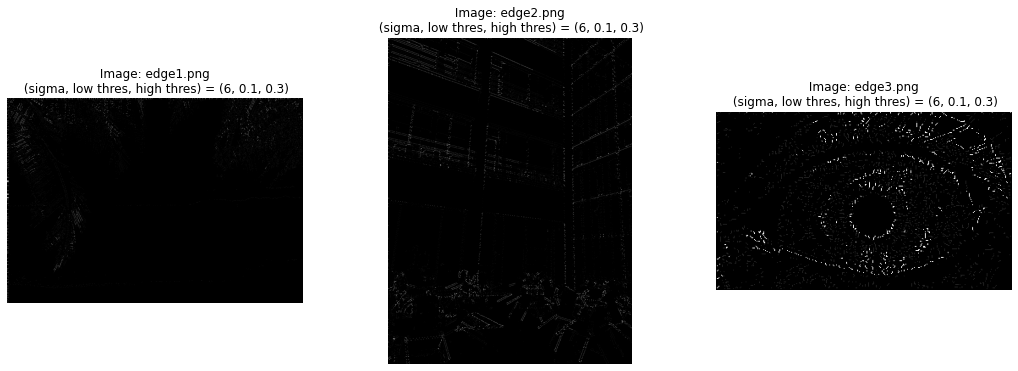

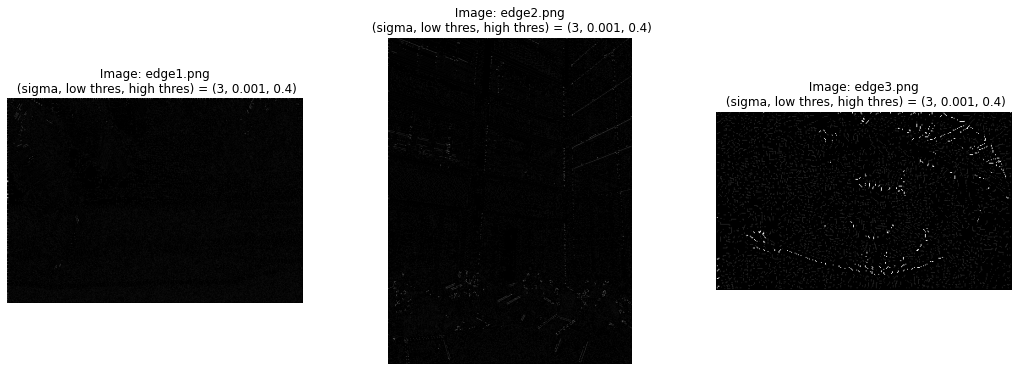

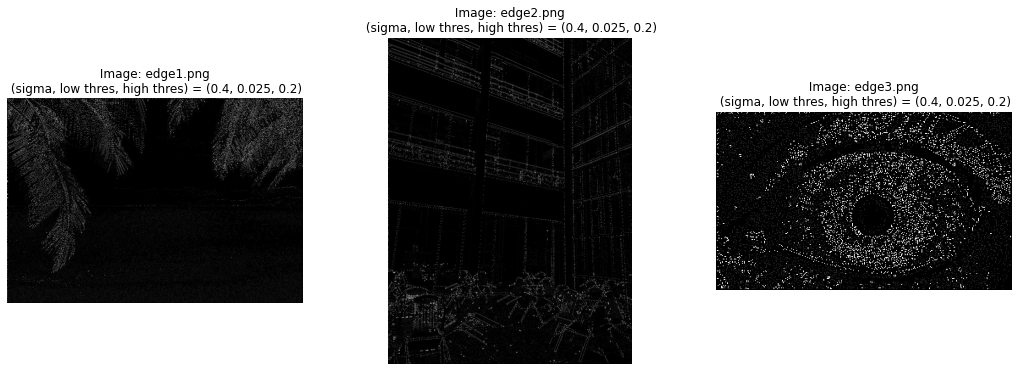

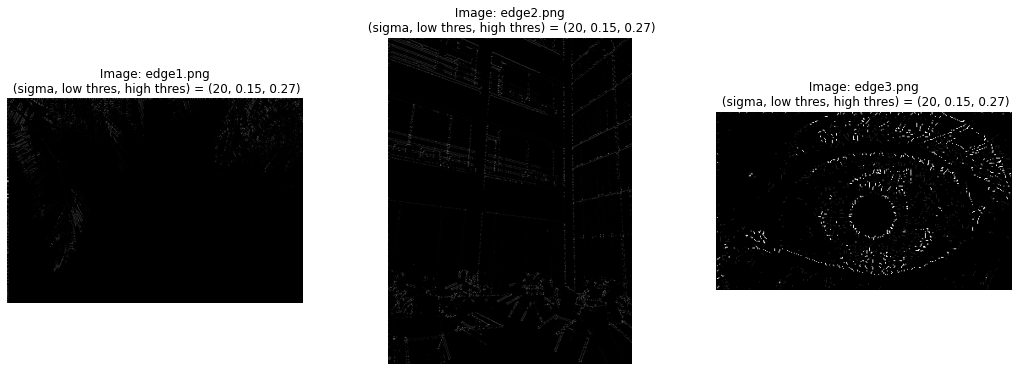

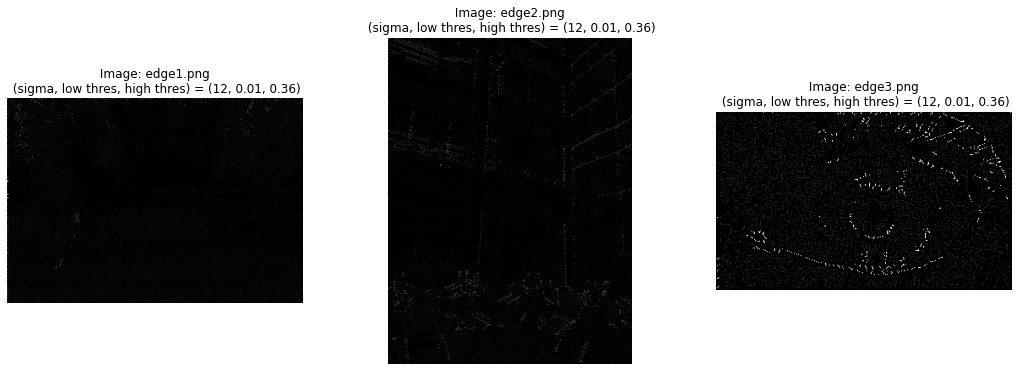

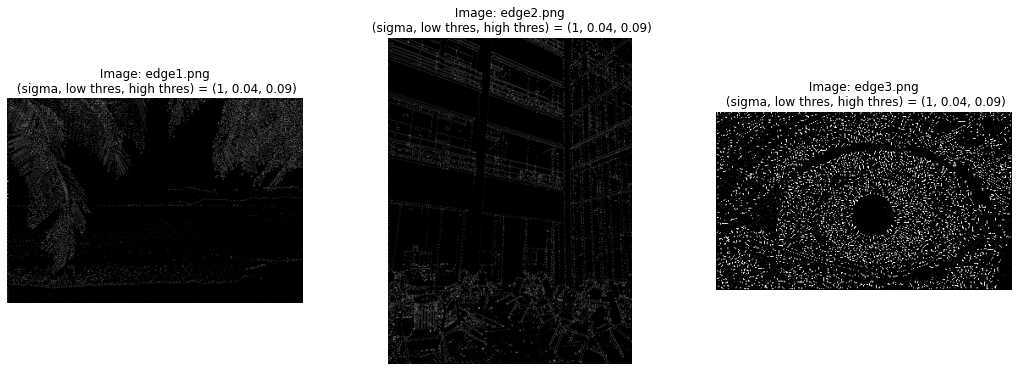

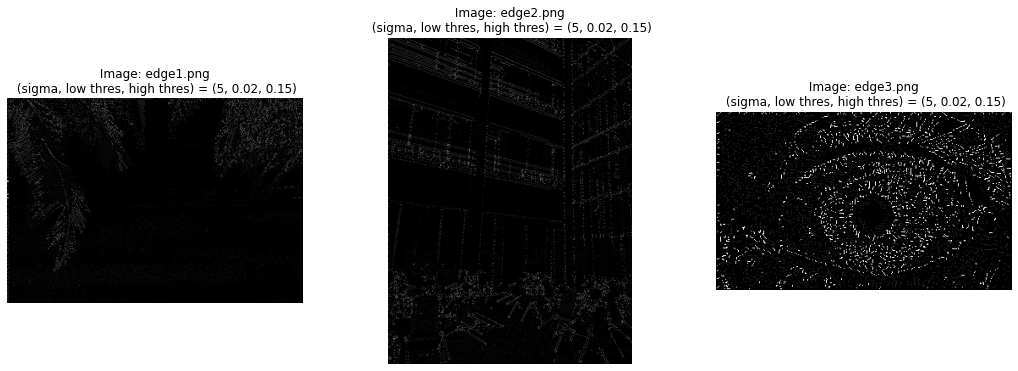

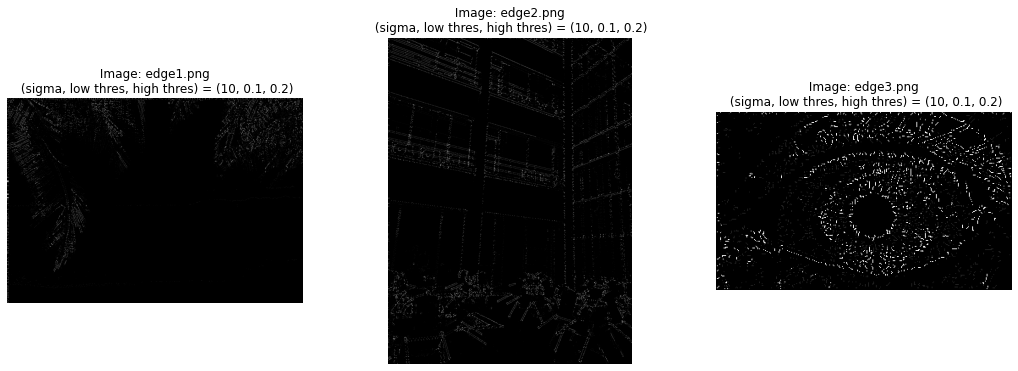

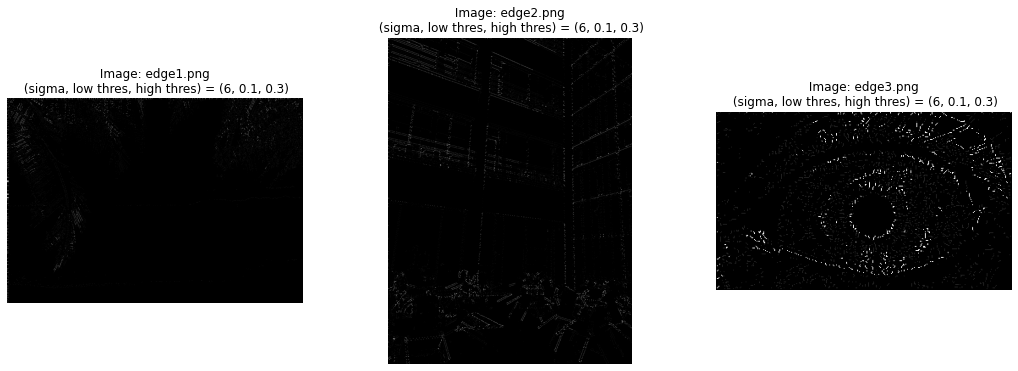

In [ ]:
%%time 

from skimage.color import rgb2gray
print('Takes a little bit of time...')

# a list of (sigma, low threshold, high threshold) values:
canny_params = [(2,   0.002,  0.5),
                (1,   0.05,   0.1),                
                (5,   0.02,   0.20),
                (10,  0.1,    0.2),
                (6,   0.1,    0.3),
                (3,   0.001,  0.4),
                (0.4, 0.025,  0.2),
                (20,  0.15,   0.27),
                (12,  0.01,   0.36),
                (1,   0.04,   0.09), 
                (5,   0.02,   0.15),
                (10,  0.1,    0.2),
                (6,  0.1,     0.3)]



for sigma, low_thres, high_thres in canny_params:

  canny_detector = CannyEdgeDetector(sigma = sigma,
                                     thres_low=low_thres,
                                     thres_high=high_thres)

  fig, axes = plt.subplots(1,3, figsize = (18,6))

  for img_path, axs in zip(img_paths, axes.flatten()):
    img = plt.imread(root_dir + img_path)
    img = rgb2gray(img)
    img = canny_detector(img)
    axs.imshow(img, cmap='gray')
    axs.axis('off')
    axs.set_title(f" Image: {img_path} \n (sigma, low thres, high thres) = {(sigma, low_thres, high_thres)}")

---ENTER your comments here!! ---


--- 

# Answers

The quality assessment of edges in an image is an important topic as it helps to benchmark the performance of edge detectors, and edge-aware filters. There are quantitative edge performance metrics such as Mean Squared Error, Peak signal-to-noise ratio, Structural Similarity etc. In this assignment, we'll measure the edge quality based on human vision by focusing on the contrast of an image and its interpretibility of the original image. As experimental results demonstrate that Canny Edge Detector outperforms the sobel and prewitt case since its more sophisticated internal structure.

        Canny Edge Detector applies sequentially to given image:

        1) Smooth image with Gaussian Noise.
        2) Find magnitude and orientation of gradient.
        3) Apply Non-max suppression.
        4) Apply double threshold
        5) Apply Hysteresis threshold.

Hence, especially with the help of non-max-suppression algorithm we can get rid of weak edges in terms of their gradient matrix and direction. This gives gain margin against to classical sobel-prewitt cases. Then, with the double thresholded hystesis algoritm, Canny edge detector produces hypothetically powerfull edges. Sobel-prewitt filters applies two directional spatial filter to given image then aggregate thes by computing their hypotenuse point-wise.

From the above visualization of detected edge images, we can see that (sigma, lower threshold, higher threshold) = (1, 0.04, 0.09) gives better performance among other Canny parameters since edges makes sense from the spatial perspective with its high interpretible contrast values among all cases


# Part 2 Edge Linking with Hough Transform

For this part of the assignment, you will implement Hough transform and visualize the quality of your Hough implementation by drawing the detected lines on the input grayscale image. Hough transform operates on the detected edges to fit line(s) on the edge pixels. Please refer to the slides on Edge Detection. You should also check other online resources such as: [PDF tutorial](http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/HoughTrans_lines_09.pdf) for various presentations of Hough transform. In this section, you have three parts to work on. See below:

1. Implement Hough transform to predict the line parameters: ρ and θ for the lines that fit to the edges as discussed in the class. Use your implementation to find the lines shown on hough.png. To check your results, please refer to `hough.png` and `hough_res.png`. For the input image: `hough.png`, the expected output is shown in `hough_res.png`. The image: `hough_res.png` shows the expected detected lines in red.


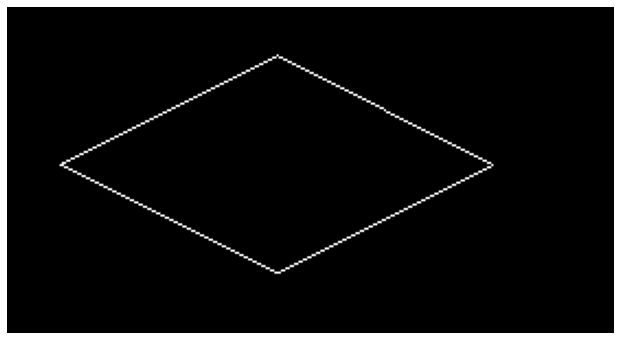

In [19]:
# implement your code here...


img_path = 'hough.png'


# Let's see the images and their shapes
fig, axes = plt.subplots(1,1,figsize = (18,6))
img = plt.imread(root_dir + img_path)
axes.imshow(img)
axes.axis('off')
plt.show()

In [20]:
def hough_line_detection(image:np.ndarray,
                         rho_resolution:int = 0.5,
                         theta_resolution:int = 0.125,
                         get_best_lines:bool = True,
                         threshold:int = 50) -> tuple:
  """

    The algorithm for detecting straight lines can be divided into the following steps:

      1. Edge detection, e.g. using the Canny edge detector. (not inside the function)
      2. Mapping of edge points to the Hough space and storage in an accumulator.
      3. Interpretation of the accumulator to yield lines of infinite length. The interpretation is
      done by thresholding and possibly other constraints.
      4. Conversion of infinite lines to finite lines.

      Reference:
        - http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/HoughTrans_lines_09.pdf


    Conversion of computationally eligible format:

    ρ = x cos θ + y sin θ

    where:

    ρ (rho) = distance from origin to the line. [-max_dist to max_dist].
              max_dist is the diagonal length of the image.  
    θ = angle from origin to the line. [-0° to 180°]


    Reference:
      - https://alyssaq.github.io/2014/understanding-hough-transform/

    Arguments:
      - image            (np.ndarray) : Binary Image 
      - rho_resolution   (int)        : Step size for rho
      - theta_resolution (int)        : Step size of theta
      - get_best_lines   (bool)       : If true, exracts best line via thresholding
      - threshold        (int)        : If get_best_lines is false, ignored. Otherwise, used for line thresholding

    Returns:
      - accumulator (np.ndarray)  : The Accumulator
      - rhos        (np.ndarray)  : Quantized rho interval
      - thetas      (np.ndarray)  : Quantized theta interval (in radians)
      - best_lines  (np.ndarray)  : List of (x1, y1, x2, y2) points represents line


    Detailed Algorithm (For my own Implementation)

      1) Decide on the range of ρ and θ. Often, the range of θ is [ 0, 180 ] degrees and ρ is [ -d, d ] where d is the length of the edge image’s diagonal.
      It is important to quantize the range of ρ and θ meaning there should be a finite number of possible values.
      2) Create a 2D array called the accumulator representing the Hough Space with dimension (num_rhos, num_thetas) and initialize all its values to zero.
      3) Perform edge detection on the original image. This can be done with any edge detection algorithm of your choice.
      4) For every pixel on the edge image, check whether the pixel is an edge pixel. 
      If it is an edge pixel, loop through all possible values of θ, calculate the corresponding ρ, 
      find the θ and ρ index in the accumulator, and increment the accumulator base on those index pairs.
      5) Loop through all the values in the accumulator. If the value is larger than a certain threshold,
      get the ρ and θ index, get the value of ρ and θ from the index pair which can then be converted back to the form of y = ax + b.

  """
  
  
  y_idxs, x_idxs = np.where(image != 0)
  
  diag = np.sqrt(x_idxs ** 2 + y_idxs ** 2)
  rho_max = np.ceil(np.max(diag))
  
  rhos = np.arange(-rho_max, rho_max + rho_resolution, rho_resolution)
  thetas = np.deg2rad(np.arange(0, 180, theta_resolution))
  
  cos_thetas = np.cos(thetas)
  sin_thetas = np.sin(thetas)
  theta_idxs = np.arange(0, len(thetas))
  
  accumulator = np.zeros((len(rhos), len(thetas)))
  for x, y in zip(x_idxs, y_idxs):
      rho_idxs = ((x * cos_thetas + y * sin_thetas + rho_max) // rho_resolution).astype(np.int)
      accumulator[rho_idxs, theta_idxs] += 1

  best_lines = []

  if get_best_lines:
    
    lines = np.argwhere(accumulator >= threshold)
    rho_idxs, theta_idxs = lines[:, 0], lines[:, 1]
    r, t = rhos[rho_idxs], thetas[theta_idxs]

    for rho, theta in zip(r, t):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        x0 = rho * cos_theta
        y0 = rho * sin_theta
        x1 = int(x0 - 1000 * sin_theta)
        y1 = int(y0 + 1000 * cos_theta)
        x2 = int(x0 + 1000 * sin_theta)
        y2 = int(y0 - 1000 * cos_theta)
        best_lines.append((x1, y1, x2, y2))


      
  return accumulator, rhos, thetas , best_lines

In [21]:
def plot_lines(image, best_lines, thres, img_name):

  fig, ax = plt.subplots(figsize=(8,6))
  ax.imshow(image, cmap='gray')
  ax.set_title(f"Hough Line Detection with threshold : {thres} \n Image: {img_name}")


  colors = ['r','m','blue','green','orange']
  for line in best_lines:
    ax.plot([line[0], line[2]], [line[1], line[3]],
             linewidth=2,
             color=np.random.choice(colors))

  plt.xlim(0, image.shape[1])
  plt.ylim(image.shape[0], 0)
  ax.axis('off')
  plt.show()

def plot_hough_space(accumulator, title:str = 'Hough Space Visualization'):

  plt.figure(figsize=(10, 10))
  plt.imshow(accumulator)
  plt.title(title)
  plt.xlabel('theta')
  plt.ylabel('rho')
  plt.xticks(np.linspace(0, accumulator.shape[1], 5), np.linspace(0, 180, 5))
  plt.yticks(np.linspace(0, accumulator.shape[0], 5), np.linspace(rhos[0], rhos[-1], 5))
  plt.show()

def show_hough_line(accumulator, thetas, rhos, thres, img_name):
  plt.figure(figsize=(10, 10))
  plt.imshow(accumulator,
             aspect='auto',
             cmap='hot',
             interpolation='hamming',
             origin='lower',
             extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
  plt.xlabel('theta')
  plt.ylabel('rho')
  plt.title(f"Hough Line Detection with threshold : {thres} \n Image: {img_name}")

  plt.show()



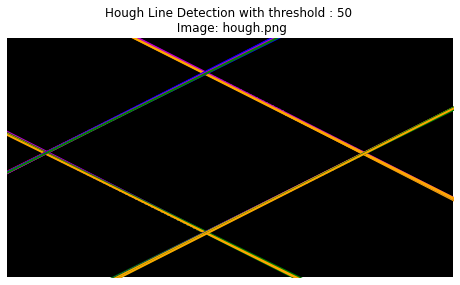

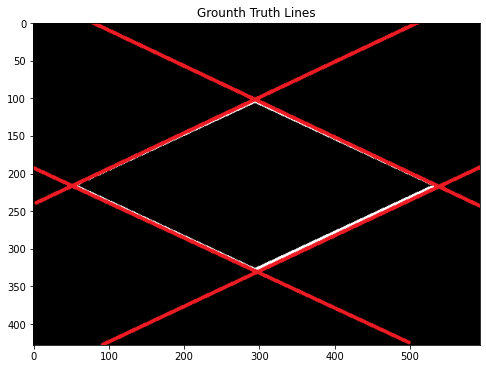

In [22]:
img_path = 'hough.png'
img = rgb2gray(plt.imread(root_dir+img_path)) 
thres = 50

accumulator, rhos, thetas, best_lines = hough_line_detection(img,
                                                             rho_resolution = 0.5,       
                                                             theta_resolution = 0.125,
                                                             get_best_lines = True,
                                                             threshold = thres)
plot_lines(image = img,
           best_lines = best_lines,
           thres = thres,
           img_name = img_path)

# Grounth Truth Lines
plt.figure(figsize=(8,6));plt.imshow(plt.imread(root_dir+'hough_res.png'));plt.title('Grounth Truth Lines');plt.show()

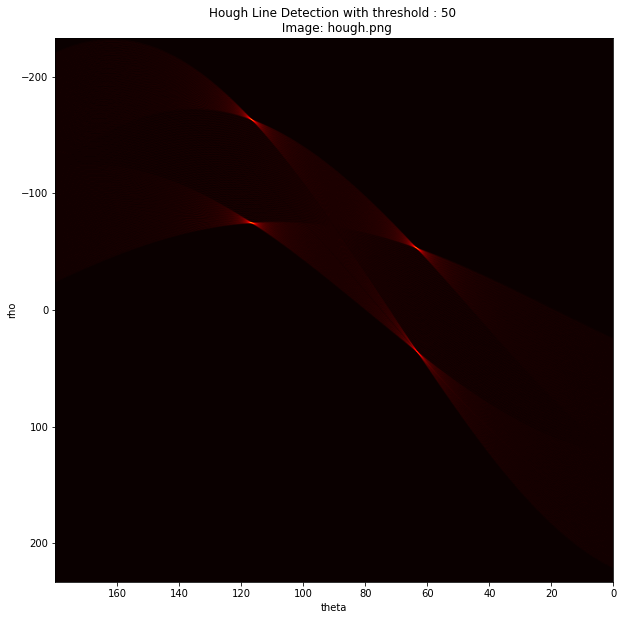

In [23]:
show_hough_line(accumulator, thetas,  rhos,thres, img_name=img_path)

2. You will use the images: `edge1.png` and `hough2.png` for the rest of this question (Image `hough2.png`). Apply Hough transform to find the lines in the images: `edge1.png` and `hough2.png` and highlight the found lines on each of those images. Remember: Typically, Hough Transform is used after applying an edge detection operator on the input image. First apply the edge detection algorithm of your choosing (from the ones used in the previous part) and then apply Hough Transform to find the lines on the detected edges. Plot both Hough Transforms (in ρ and θ space) and detected lines in the image space for each image. Did you need to use thresholding in Hough Space? If so, what threshold value worked best for you to find meaningful lines on each image?

3. For the image: `edge.png`, use Hough Transform and particularly find the line of the horizon that is clearly visible in the image. Report your results. Comment on the performance of your implementation, how well you were able to find the horizon line.

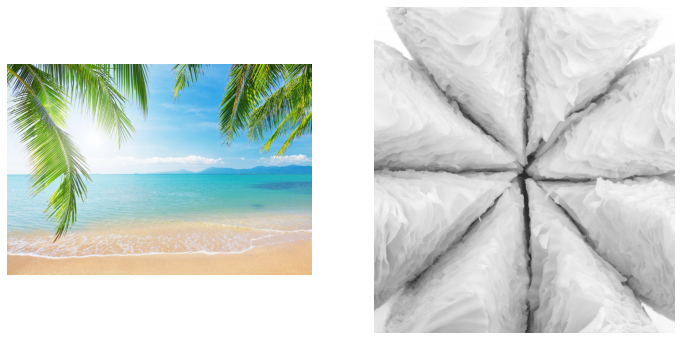

In [24]:
# implement your code here...
from skimage.color import rgb2gray
import cv2

img_paths = ['edge1.png','hough2.png']

# Let's see the images and their shapes
fig, axes = plt.subplots(1,2,figsize = (12,6))

for img_path, axs in zip(img_paths, axes.flatten()):
  img = plt.imread(root_dir + img_path)
  axs.imshow(img)
  axs.axis('off')

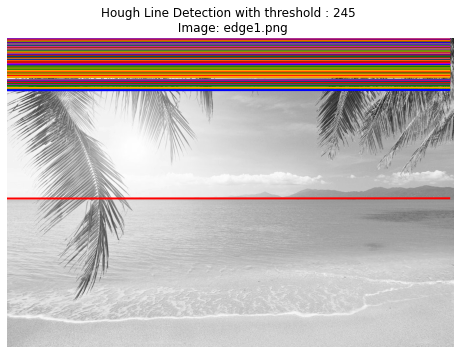

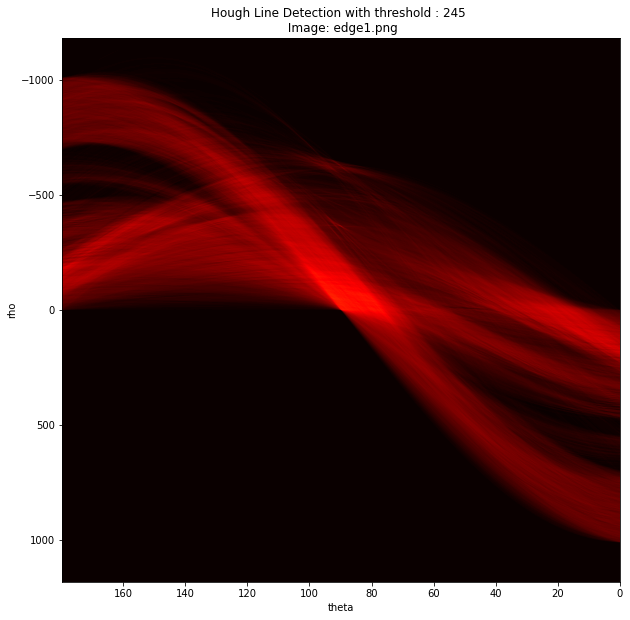

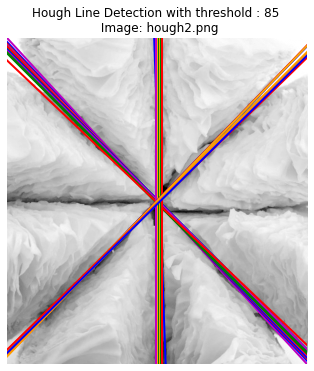

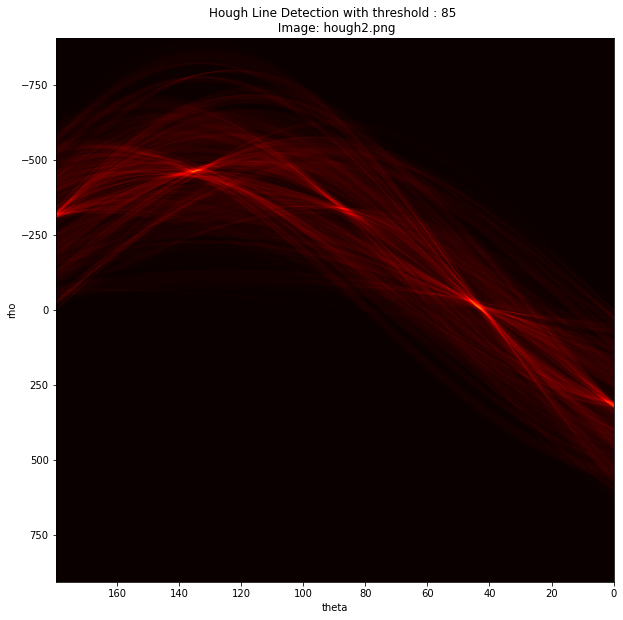

In [ ]:
apply_morph = False
img_paths = ['edge1.png', 'hough2.png']
thresholds = [245, 85] 


for img_path, thres in zip(img_paths, thresholds):

  # Read image as gray scale:
  img = cv2.imread(root_dir + img_path, 0)

  # Apply gaussian blur to smooth the image:
  # img = cv2.GaussianBlur(img, (5,5), 2)

  # Get edge image by Canny: 
  edge_image = cv2.Canny(img, 100, 200)
  
  # Apply dilation and erosion if true:
  if apply_morph:
    edge_image = cv2.dilate(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )
    edge_image = cv2.erode(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )



  
  # Main operation:
  accumulator, rhos, thetas, best_lines = hough_line_detection(edge_image,
                                                               rho_resolution = 0.5,       
                                                               theta_resolution = 0.125,
                                                               get_best_lines = True,
                                                               threshold = thres)

  plot_lines(image = img,
             best_lines = best_lines,
             thres = thres,
             img_name = img_path)

  # Displaying Hough Space
  show_hough_line(accumulator,
                  thetas,
                  rhos,
                  thres = thres,
                  img_name = img_path)


---ENTER your comments here!! ---
--- 

# Answer

Thresholding hough space is reasonable computation for eliminating unnessary lines computed via hough line detector so we utilize the thresholding application in our case. I used (245, 85) values for thresholding to get hough line for the images edge1.png and hough2.png, respectively, according to experiments that I conducted to search best threshold values. The performance of hough line detection algorithm is reasonably well since we succesfully extract meaningful line fittings in both images. In the edge1.png, we succesfully detected the horizontal line with extra lines that is reasonable for our application. Hence, we succesfully detect the horizon of given image. In a nutshell, our 'from scratch' implementations performs quite well in both cases as we succesfully detected the lines in image.

